In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy
from pathlib import Path

import matplotlib.pyplot as plt
from sklearn.cluster import k_means, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [2]:
import sys

sys.path.append("../src")

In [3]:
from core import SITE_NAMES
from calls import plot_call_features, compute_features

In [4]:
site_key = 'Central'
location_call_signals = np.load(f'../data/detected_calls/{site_key}/2022_{site_key}_top1_call_signals.npy', allow_pickle=True)

location_calls_sampled = pd.read_csv(f'../data/detected_calls/{site_key}/2022_{site_key}_top1.csv', index_col=0, low_memory=False)
location_calls_sampled['index'] = location_calls_sampled.index

fft_signals = compute_features.generate_ffts_for_calls(location_calls_sampled, location_call_signals)
welch_signals = compute_features.generate_welchs_for_calls(location_calls_sampled, location_call_signals)

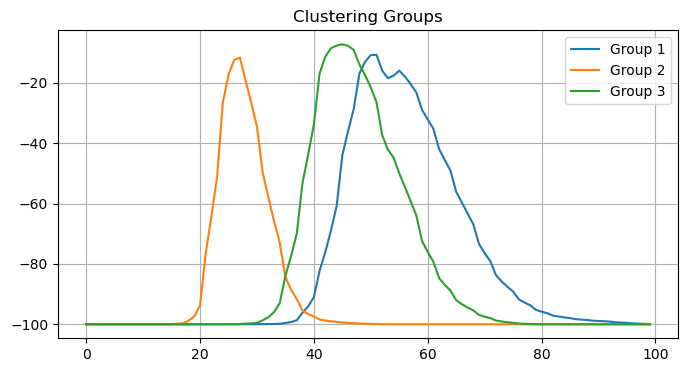

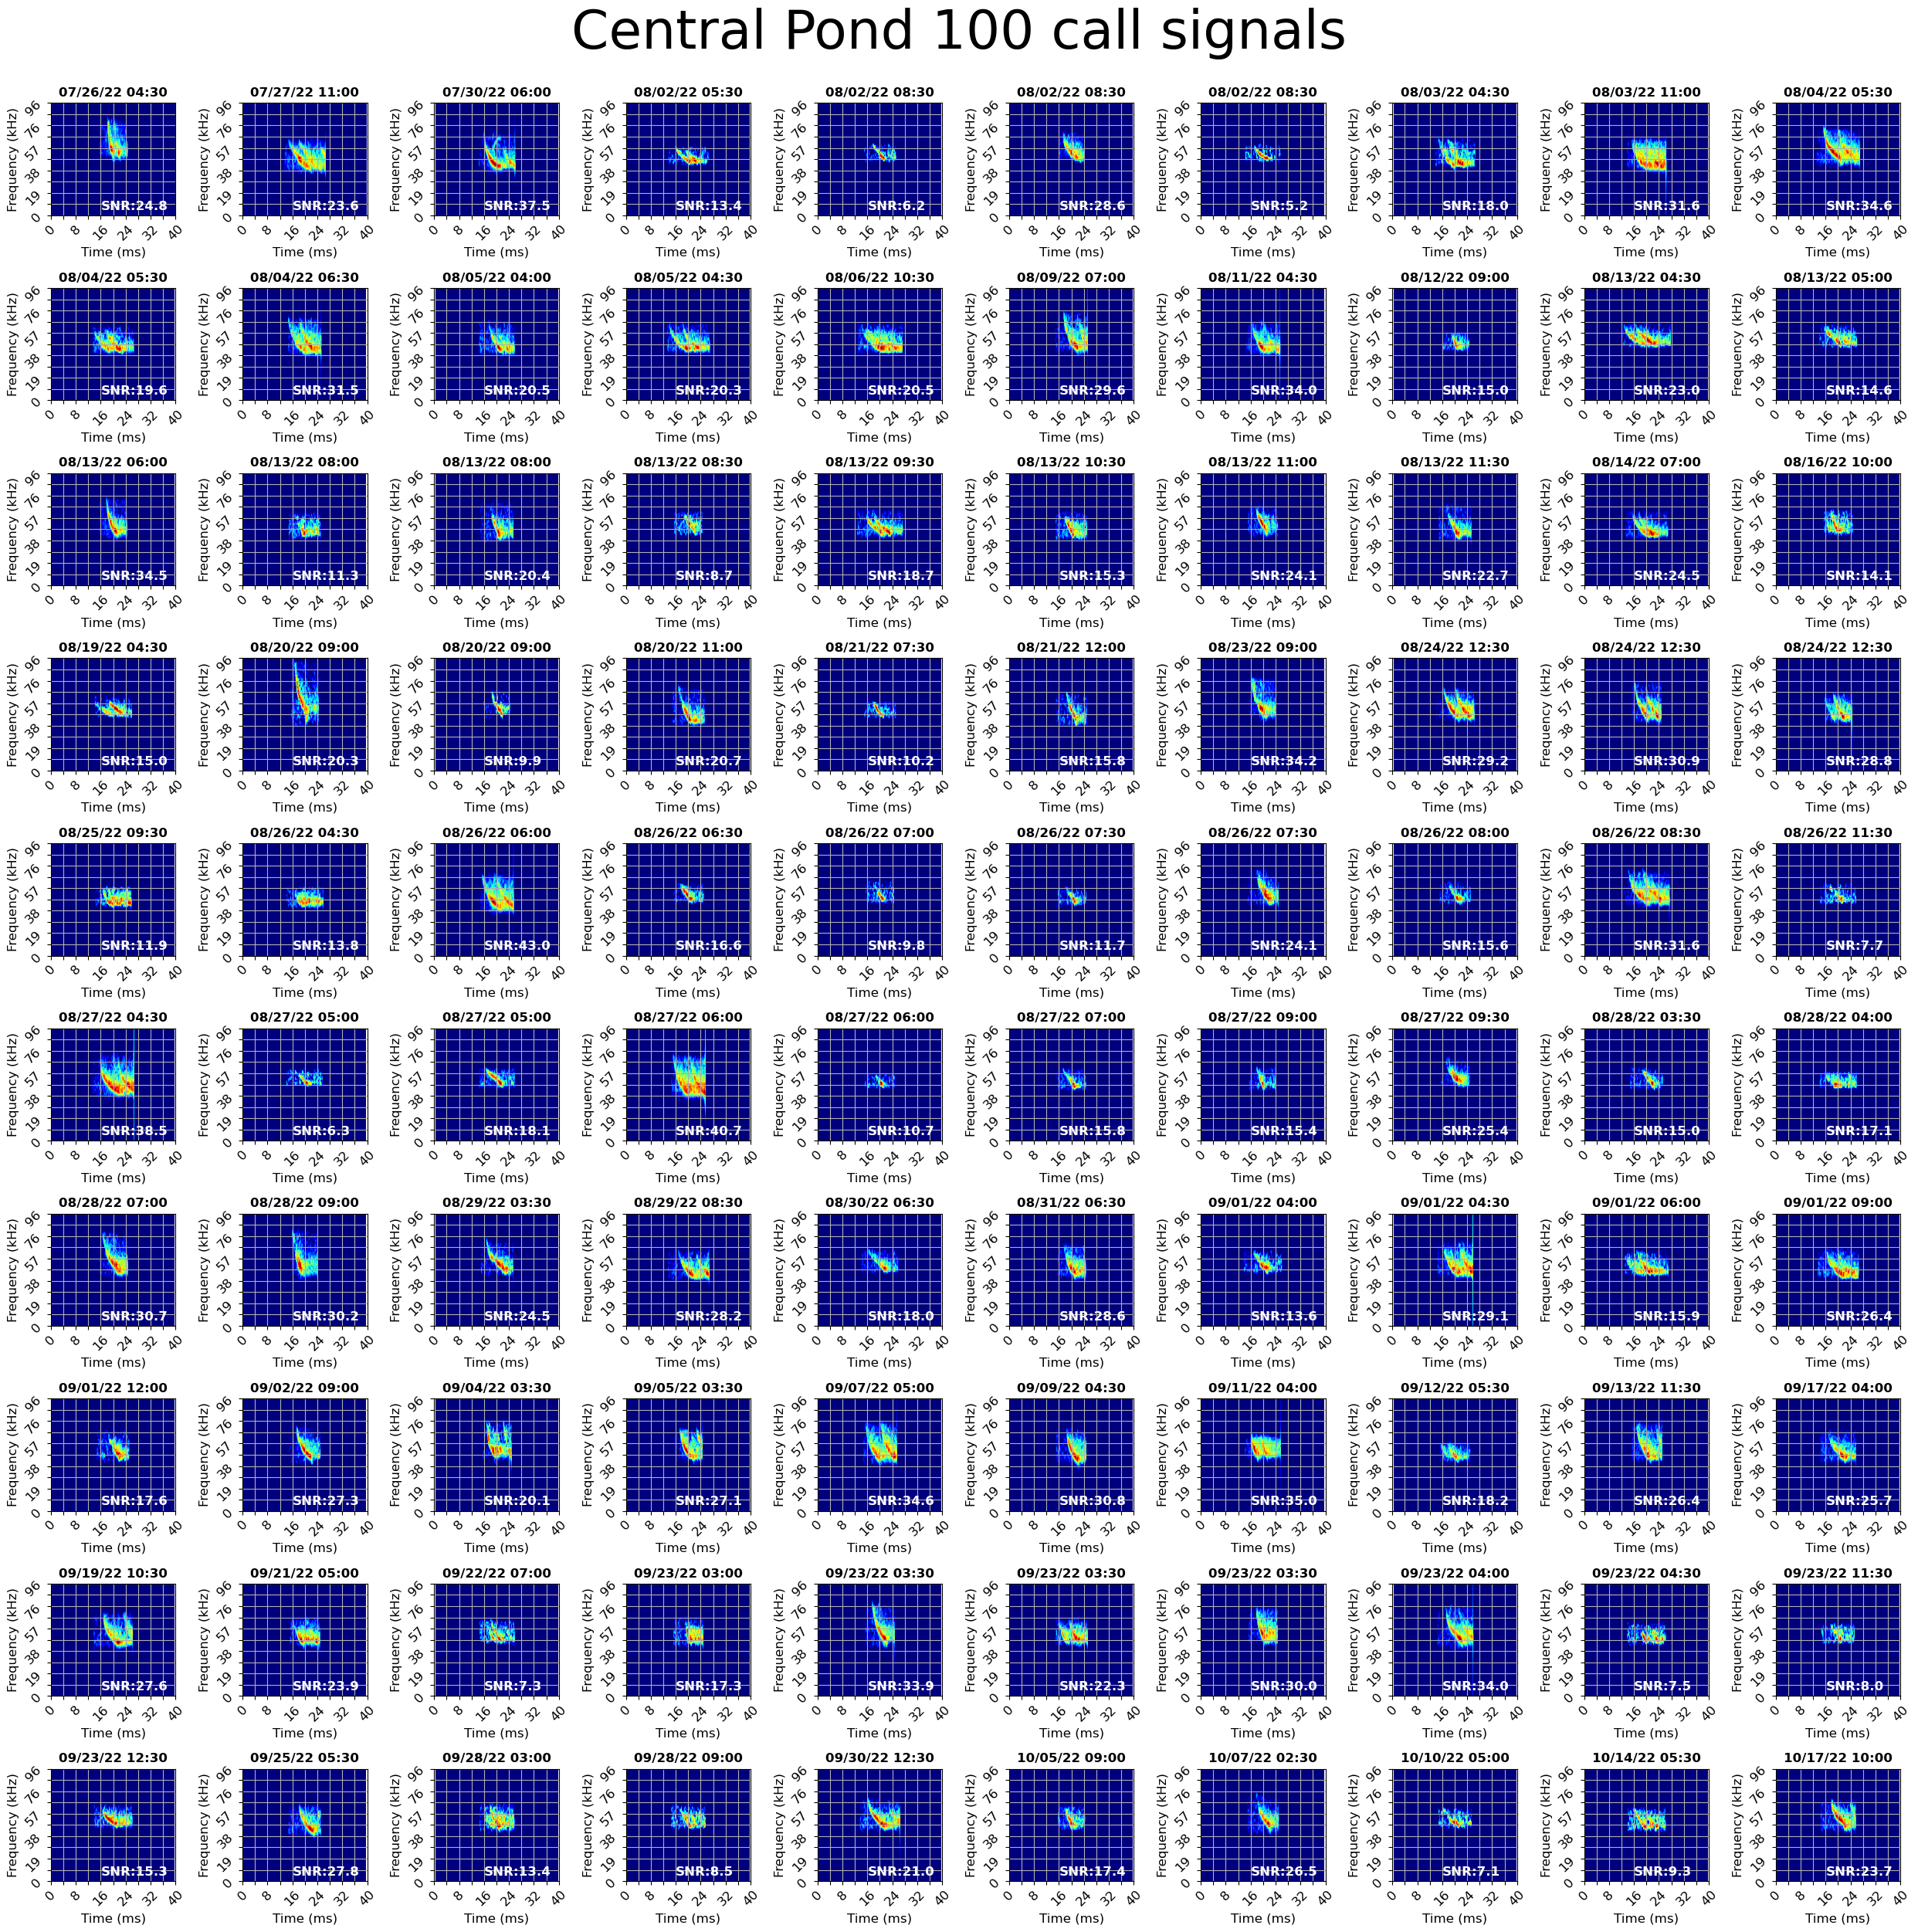

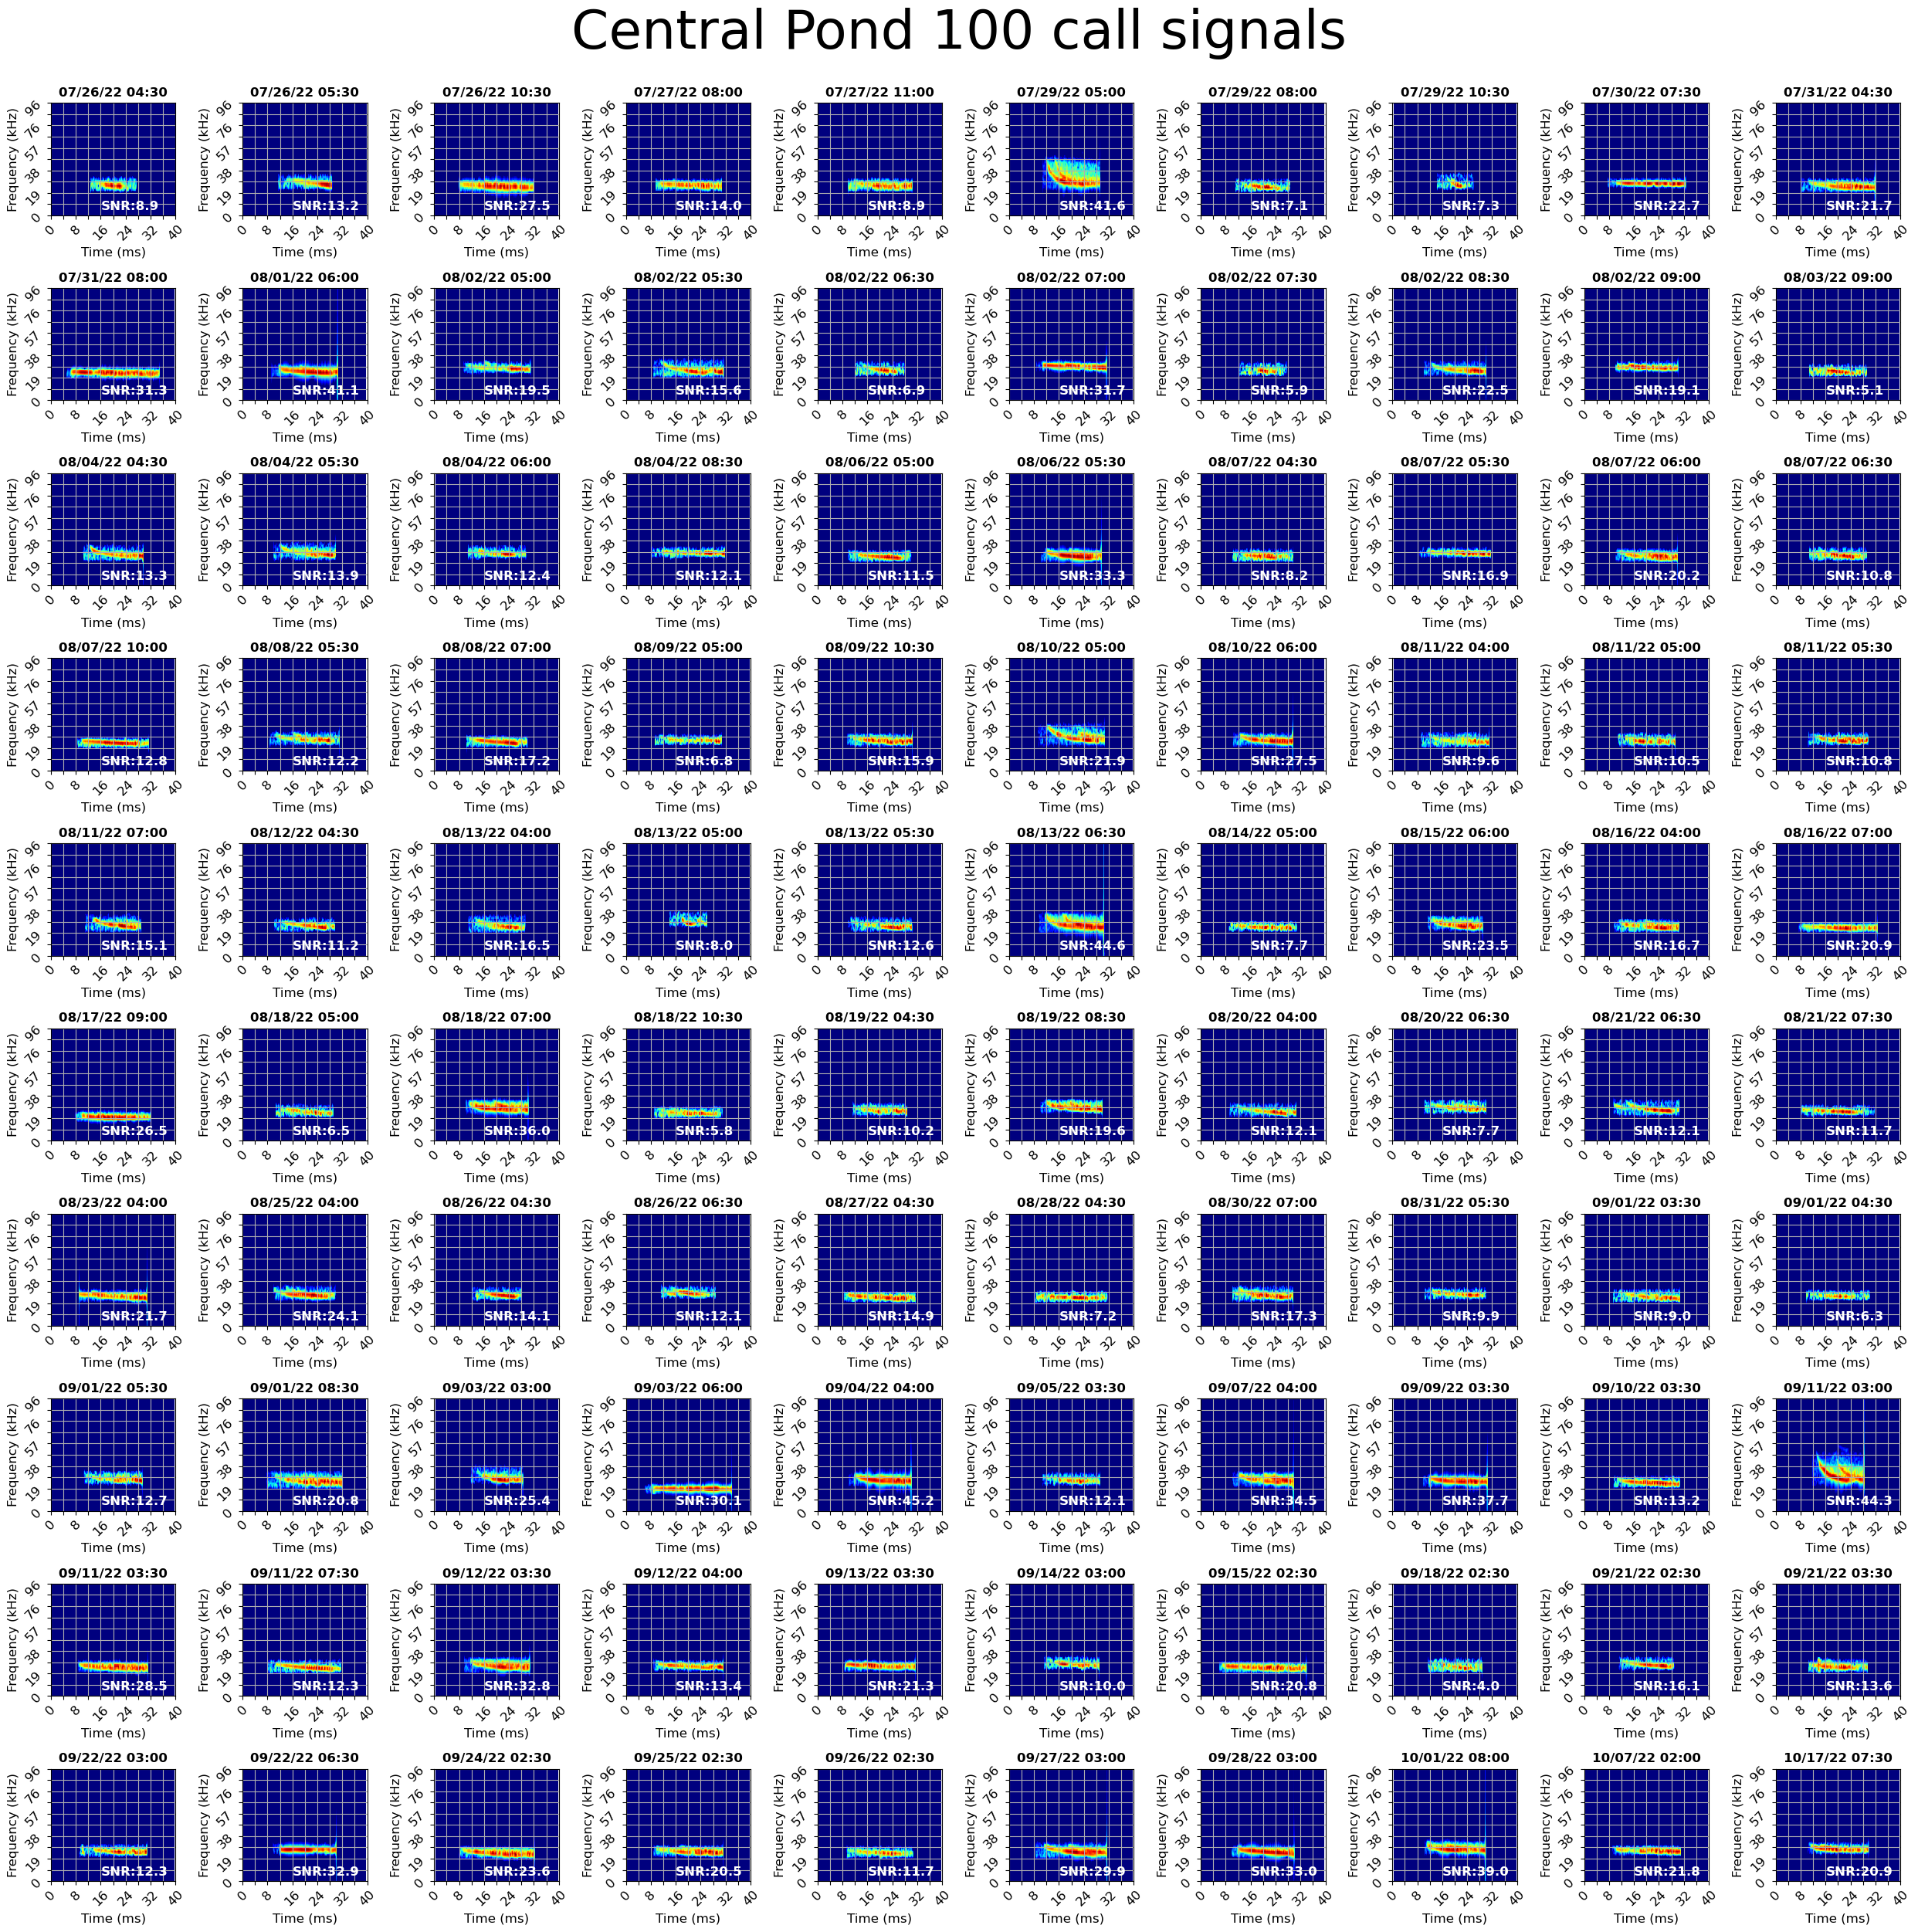

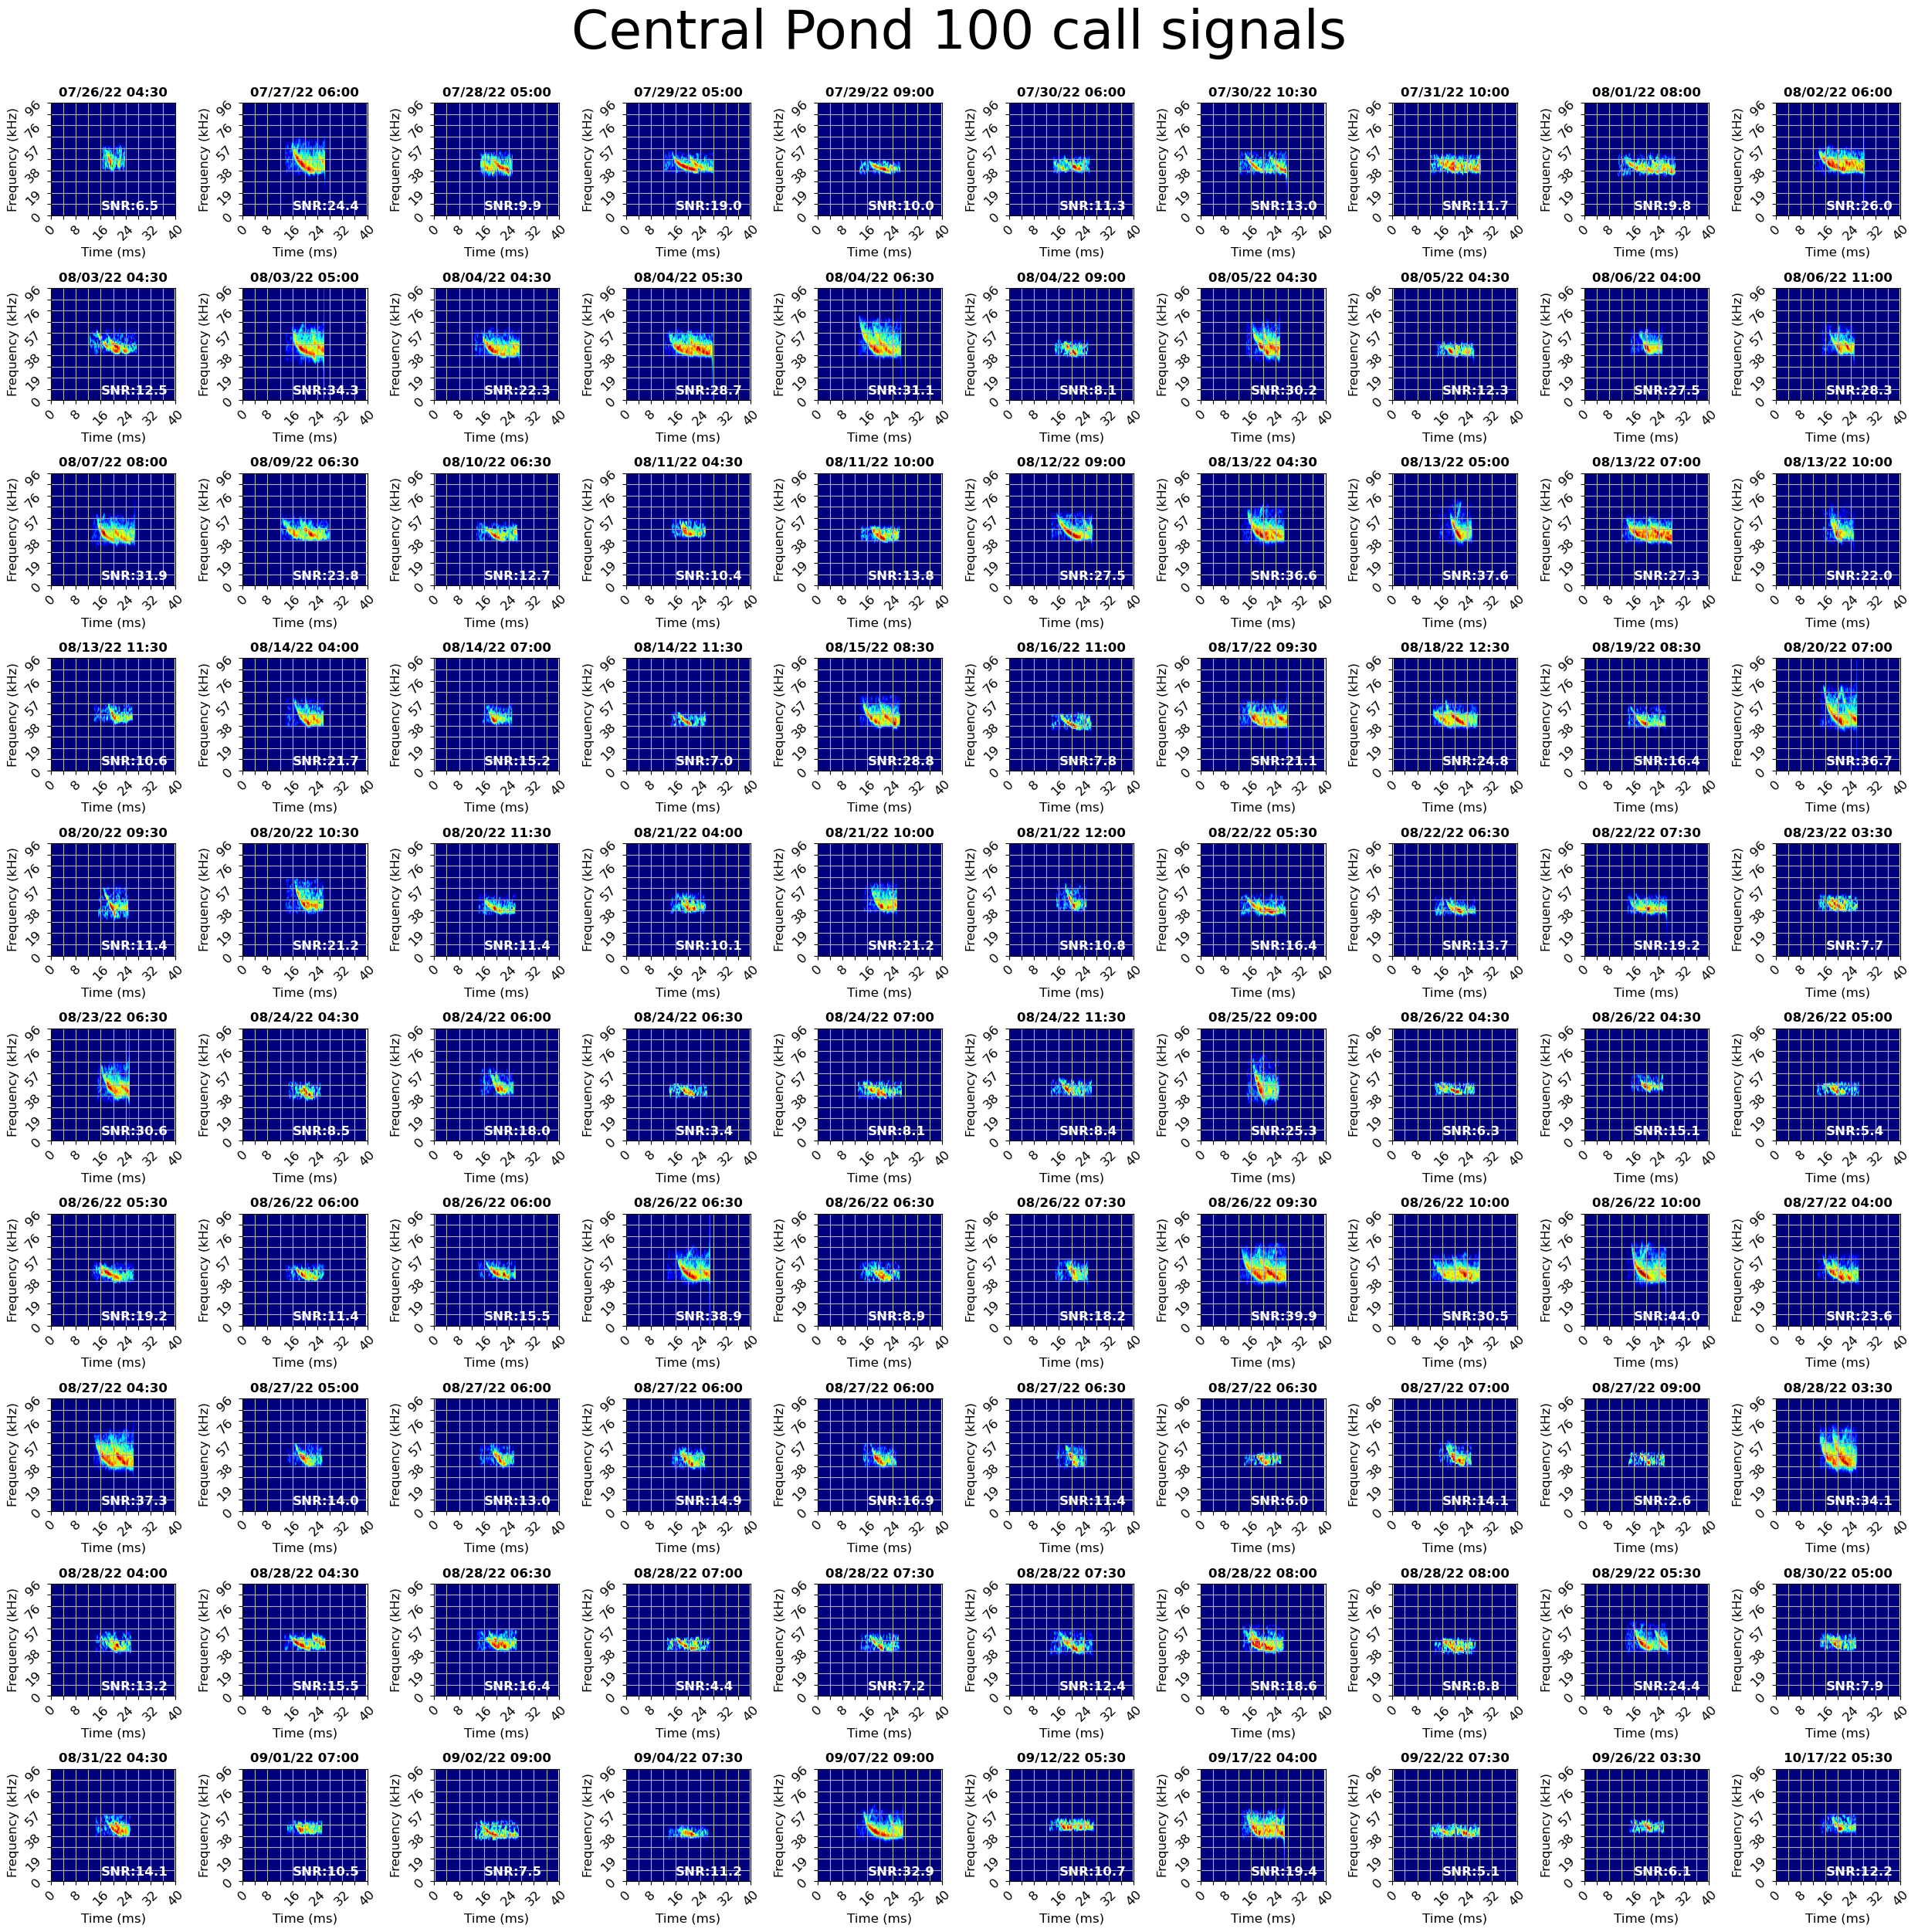

In [7]:
k = 3
kmean_welch = KMeans(n_clusters=k, n_init=10).fit(welch_signals)
plt.figure(figsize=(8, 4))
plt.title(f'Clustering Groups')
for i in range(k):
    plt.plot(kmean_welch.cluster_centers_[i], label=f'Group {i+1}')
plt.grid(which='both')
plt.legend()
plt.show()

for i in range(k):
    group_calls_sampled = location_calls_sampled[kmean_welch.labels_==i].reset_index().drop(['level_0'], axis=1)
    plot_call_features.plot_hundred_calls(group_calls_sampled, location_call_signals, site_key)

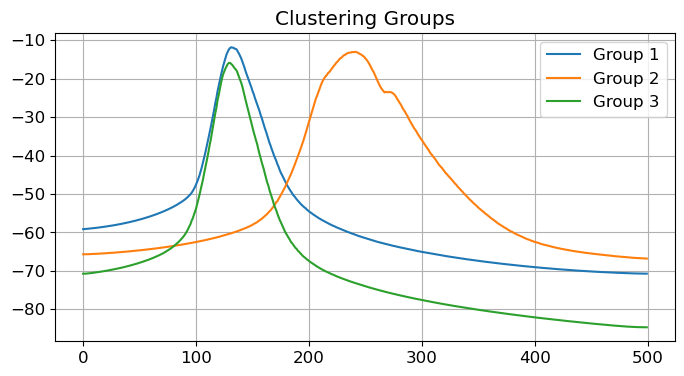

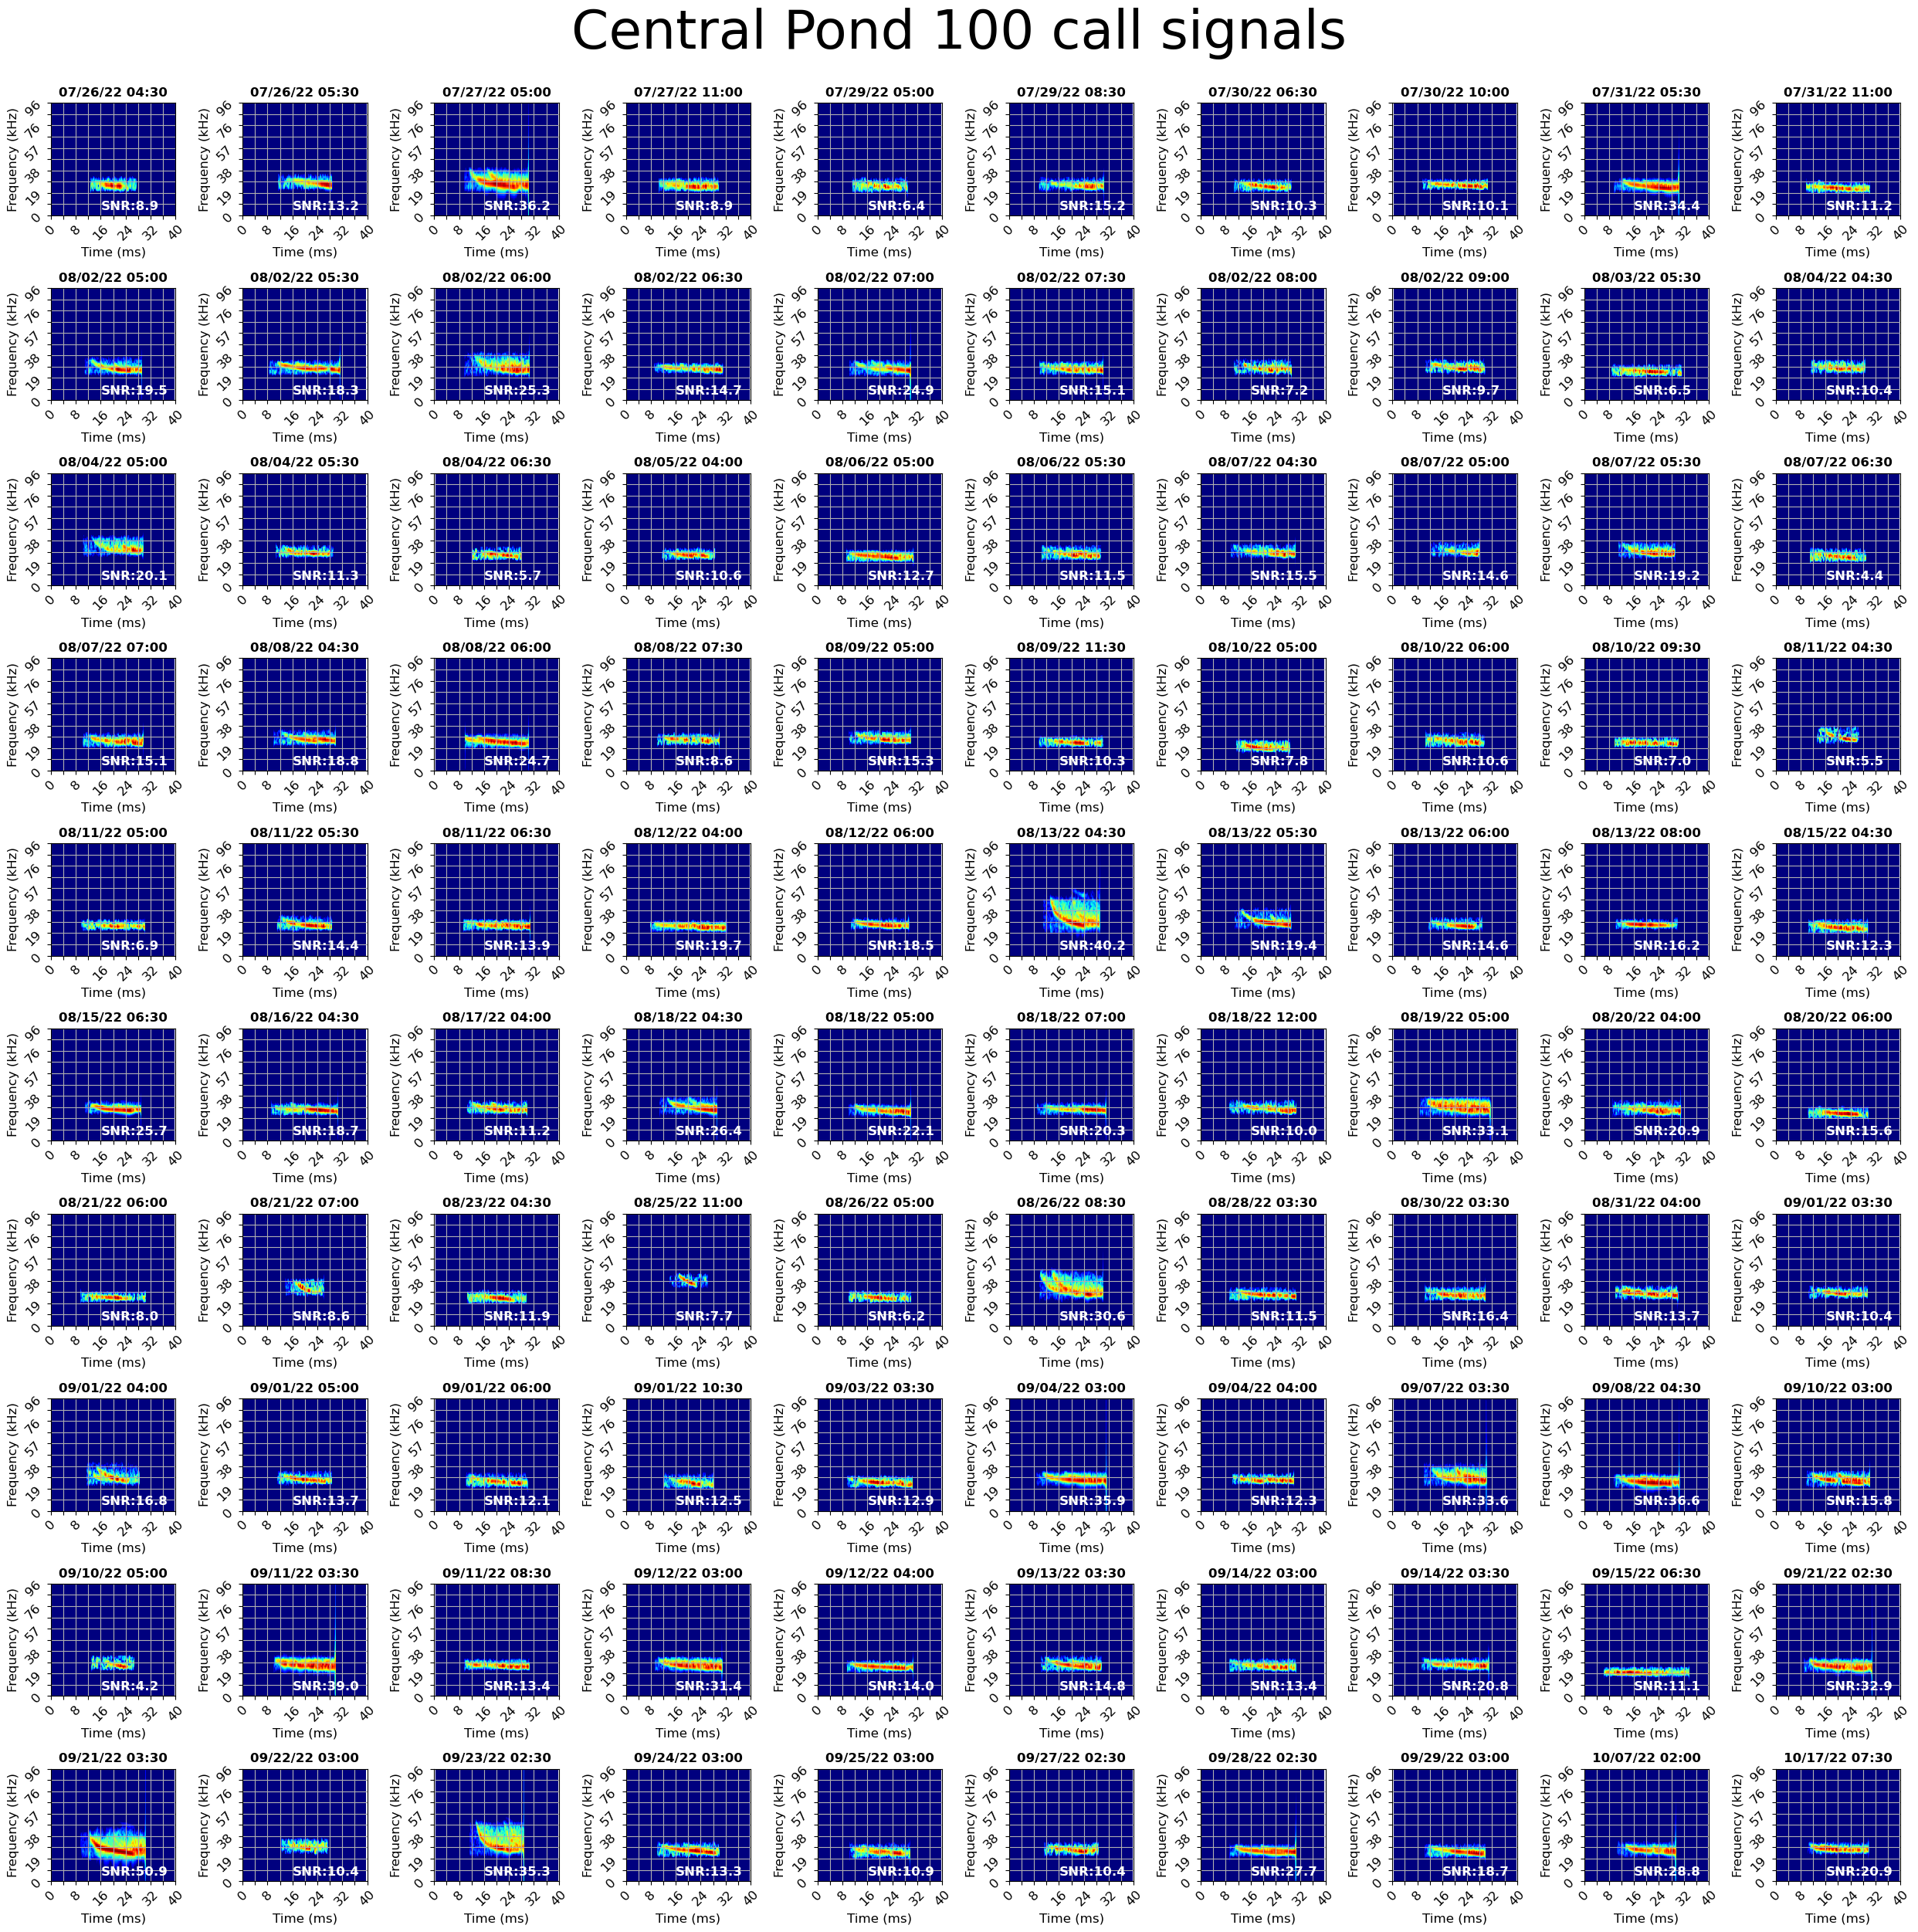

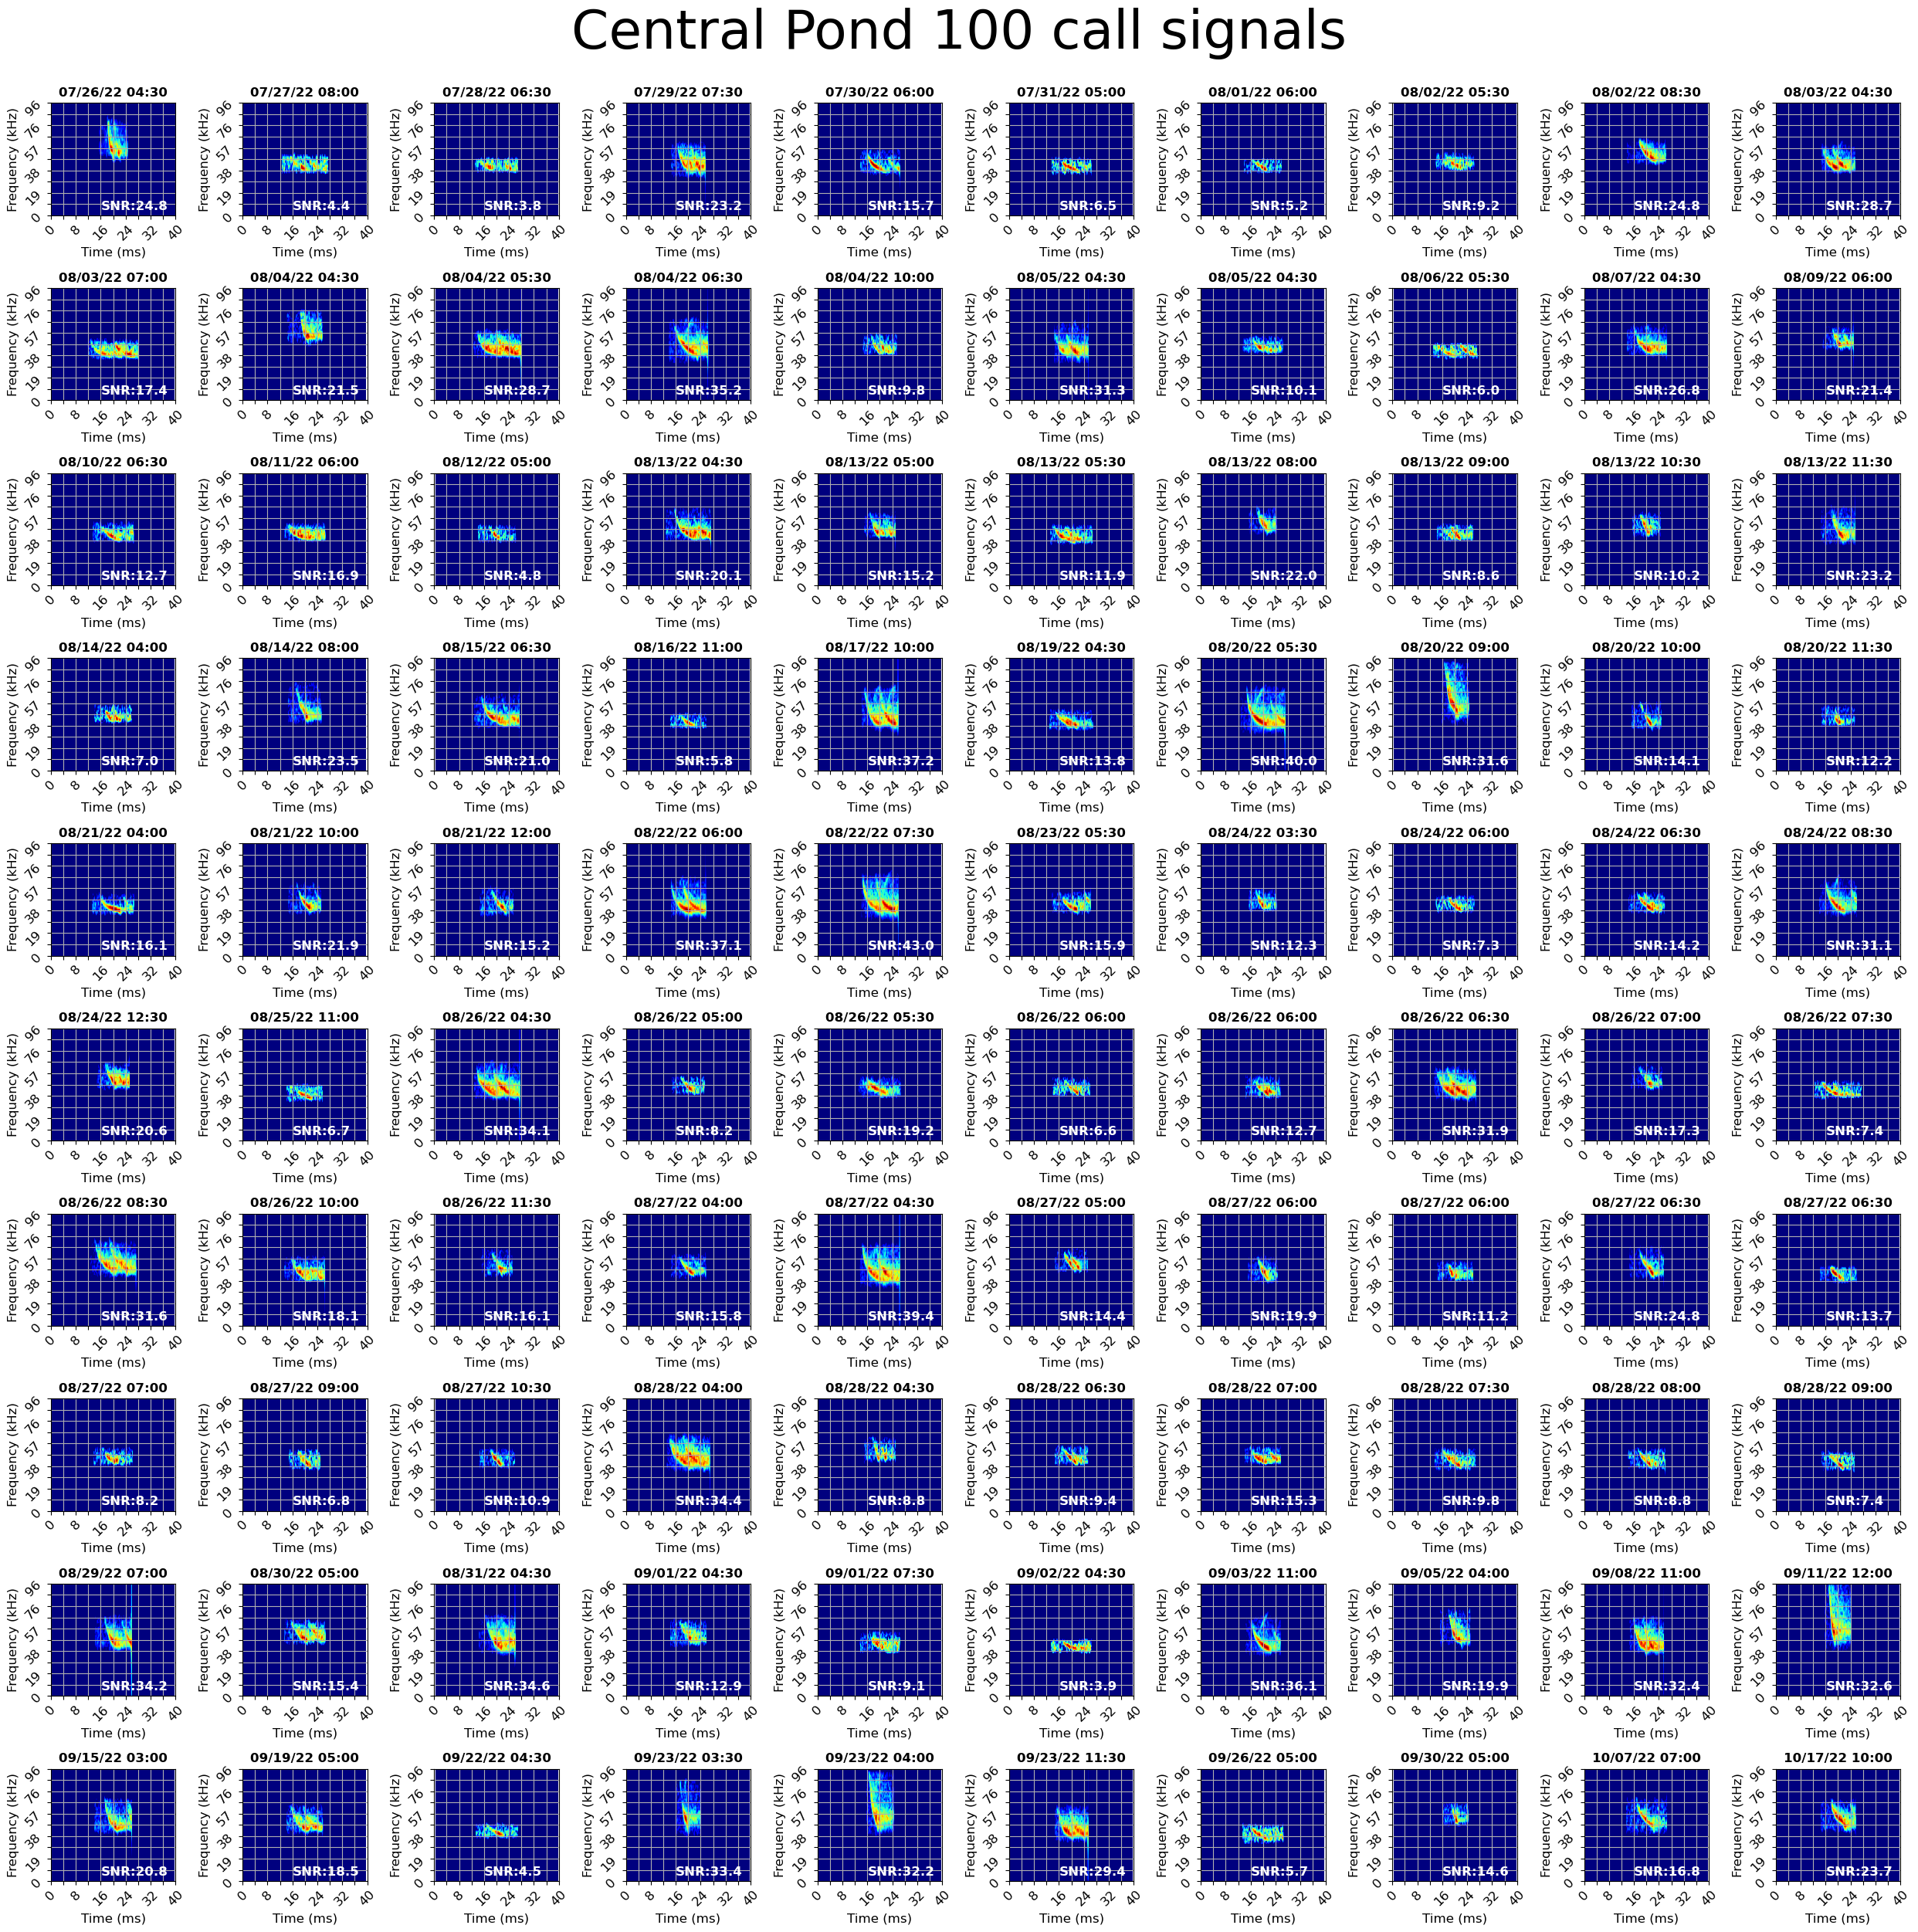

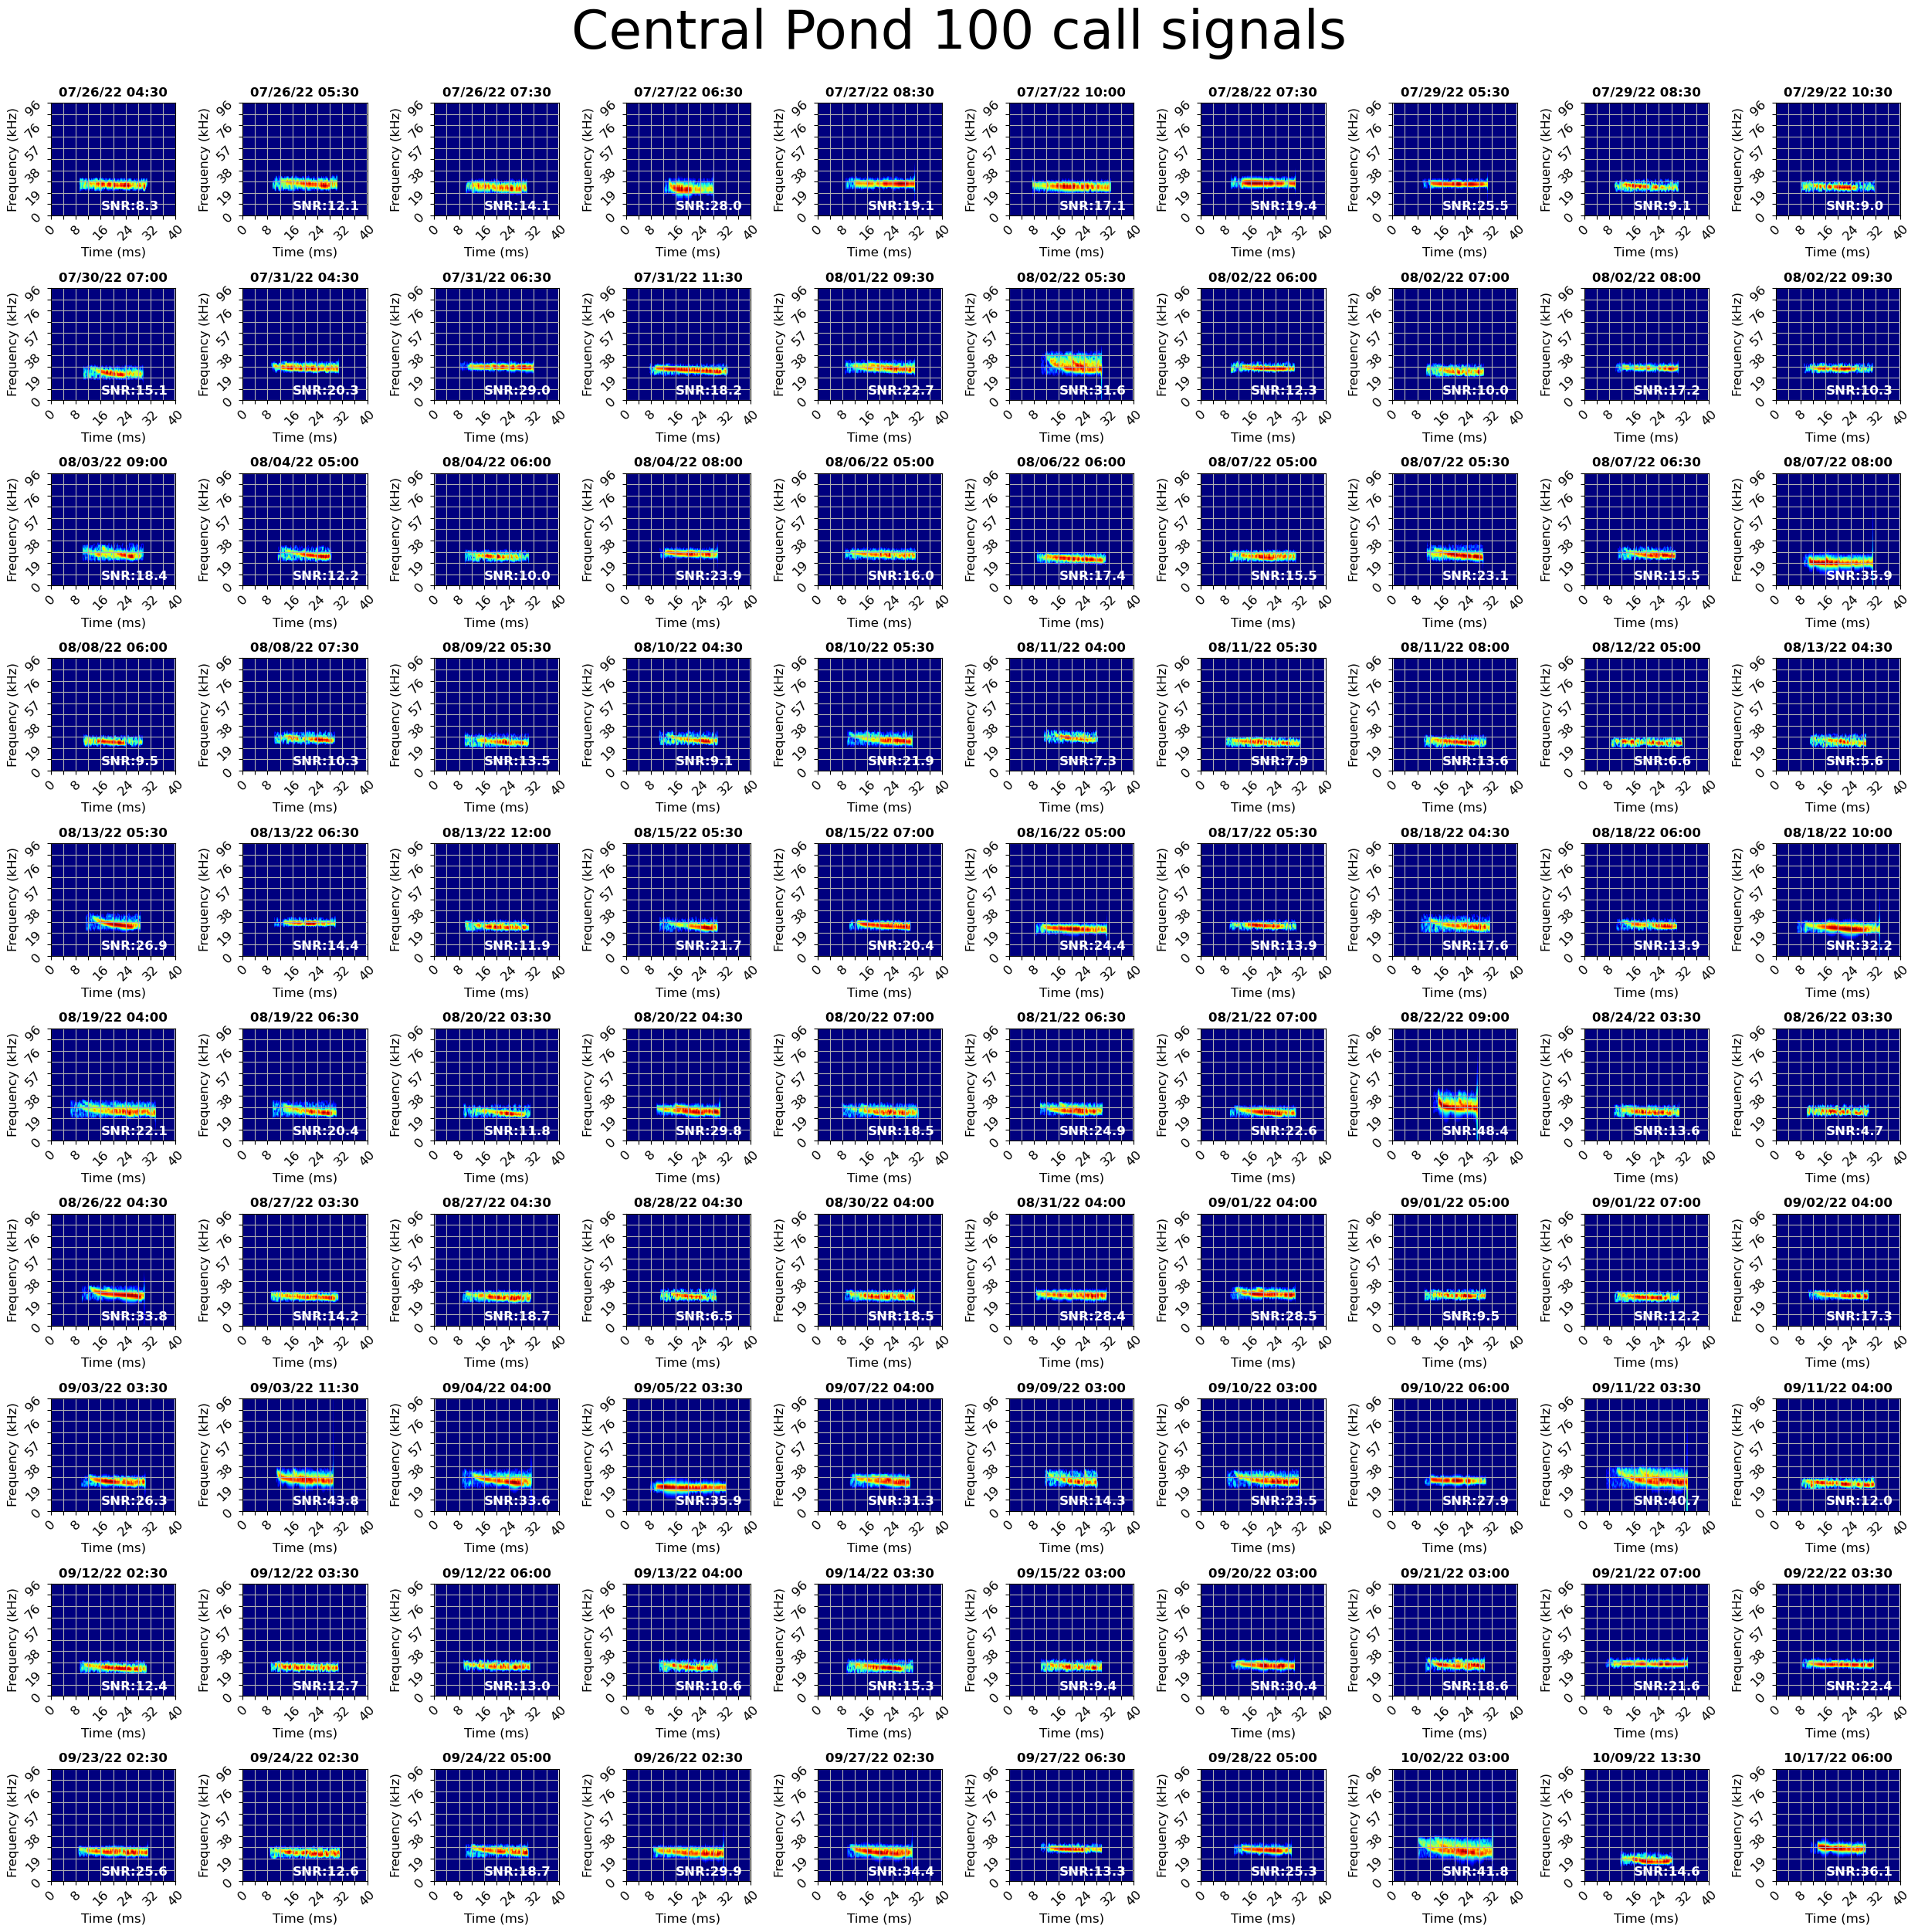

In [8]:
k = 3
kmean_fft = KMeans(n_clusters=k, n_init=10).fit(fft_signals)
plt.figure(figsize=(8, 4))
plt.title(f'Clustering Groups')
for i in range(k):
    plt.plot(kmean_fft.cluster_centers_[i], label=f'Group {i+1}')
plt.grid(which='both')
plt.legend()
plt.show()

for i in range(k):
    group_calls_sampled = location_calls_sampled[kmean_fft.labels_==i].reset_index().drop(['level_0'], axis=1)
    plot_call_features.plot_hundred_calls(group_calls_sampled, location_call_signals, site_key)